In [4]:
import pandas as pd

data = pd.read_csv("IMDb-sample.csv")

In [2]:
data

,Index,URL,Text,Sentiment
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS
...,...,...,...,...
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG


In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [1]:
!pip install --quiet swifter

Swifter é uma biblioteca Python que funciona como um "acelerador" para a popular biblioteca de manipulação de dados, a Pandas.

Em uma frase: Swifter torna as operações .apply() em DataFrames e Series do Pandas drasticamente mais rápidas, de forma inteligente e automática.

return_tensors="pt" (PyTorch):  
Retorna os dados como torch.Tensor.  
É o que você deve usar quando seu modelo e todo o seu código estão escritos em PyTorch.  

return_tensors="tf" (TensorFlow):  
Retorna os dados como tf.Tensor.  
Usado quando você está trabalhando com modelos no ecossistema TensorFlow/Keras.  

No caso do modelo utilizado , tem restricao de limite de tokens para cada analise, que eh de 512 tokens. 
Por isso se faz necessario truncar e usar apenas 512 tokens:

In [5]:
from tqdm.auto import tqdm
from transformers import AutoTokenizer
import swifter

tqdm.pandas()

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

def truncate_text(text, max_tokens=512):
    """
    """
    words = text.split()
    block = []
    for word in words:
        block.append(word)
        tokens = tokenizer(" ".join(block), return_tensors="pt", truncation=False)
        if tokens["input_ids"].shape[1] >= max_tokens:
            block.pop()
            break
    return " ".join(block)

data["text_truncated"] = data.Text.swifter.apply(truncate_text)

Pandas Apply: 100%|██████████| 2000/2000 [05:01<00:00,  6.64it/s]


In [6]:
results = classifier(data.text_truncated.tolist())

In [7]:
data['classifier'] = [r["label"] for r in results]

In [8]:
data

,Index,URL,Text,Sentiment,text_truncated,classifier
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS,Girlfight follows a project dwelling New York ...,POSITIVE
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS,Hollywood North is an euphemism from the movie...,POSITIVE
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS,That '70s Show is definitely the funniest show...,POSITIVE
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS,"9/10- 30 minutes of pure holiday terror. Okay,...",NEGATIVE
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS,"A series of random, seemingly insignificant th...",POSITIVE
...,...,...,...,...,...,...
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG,Tourists head to Ireland for a school trip to ...,NEGATIVE
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG,Two films are useful for scaring people to God...,NEGATIVE
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG,Ulises is a literature teacher that arrives to...,NEGATIVE
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG,"Um... Okay, I guess I get the whole shaky-cam,...",NEGATIVE


In [9]:
data['truncated'] = data.Text.str.len() > data.text_truncated.str.len()

In [10]:
data

,Index,URL,Text,Sentiment,text_truncated,classifier,truncated
0,3617,http://www.imdb.com/title/tt0210075/usercomments,Girlfight follows a project dwelling New York ...,POS,Girlfight follows a project dwelling New York ...,POSITIVE,False
1,3671,http://www.imdb.com/title/tt0337640/usercomments,Hollywood North is an euphemism from the movie...,POS,Hollywood North is an euphemism from the movie...,POSITIVE,False
2,3157,http://www.imdb.com/title/tt0303549/usercomments,That '70s Show is definitely the funniest show...,POS,That '70s Show is definitely the funniest show...,POSITIVE,False
3,660,http://www.imdb.com/title/tt0716825/usercomments,"9/10- 30 minutes of pure holiday terror. Okay,...",POS,"9/10- 30 minutes of pure holiday terror. Okay,...",NEGATIVE,False
4,265,http://www.imdb.com/title/tt0182225/usercomments,"A series of random, seemingly insignificant th...",POS,"A series of random, seemingly insignificant th...",POSITIVE,False
...,...,...,...,...,...,...,...
1995,1499,http://www.imdb.com/title/tt0318040/usercomments,Tourists head to Ireland for a school trip to ...,NEG,Tourists head to Ireland for a school trip to ...,NEGATIVE,True
1996,3721,http://www.imdb.com/title/tt0070795/usercomments,Two films are useful for scaring people to God...,NEG,Two films are useful for scaring people to God...,NEGATIVE,False
1997,8983,http://www.imdb.com/title/tt0261311/usercomments,Ulises is a literature teacher that arrives to...,NEG,Ulises is a literature teacher that arrives to...,NEGATIVE,False
1998,8222,http://www.imdb.com/title/tt0888019/usercomments,"Um... Okay, I guess I get the whole shaky-cam,...",NEG,"Um... Okay, I guess I get the whole shaky-cam,...",NEGATIVE,False


In [11]:
real = (data.Sentiment == "POS").astype(float).values
pred = (data.classifier == "POSITIVE").astype(float).values

In [16]:
!pip --quiet install  scikit-learn seaborn

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(real, pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1000
         1.0       0.94      0.88      0.91      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [19]:
cm = confusion_matrix(real, pred)

print(cm)

[[939  61]
 [119 881]]


Text(50.722222222222214, 0.5, 'True')

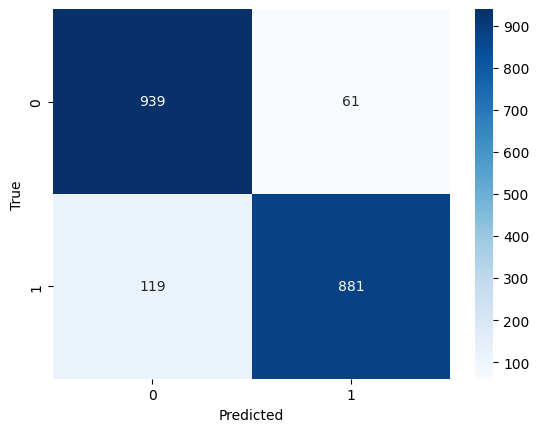

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")


              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       176
         1.0       0.92      0.79      0.85       170

    accuracy                           0.86       346
   macro avg       0.87      0.86      0.86       346
weighted avg       0.87      0.86      0.86       346



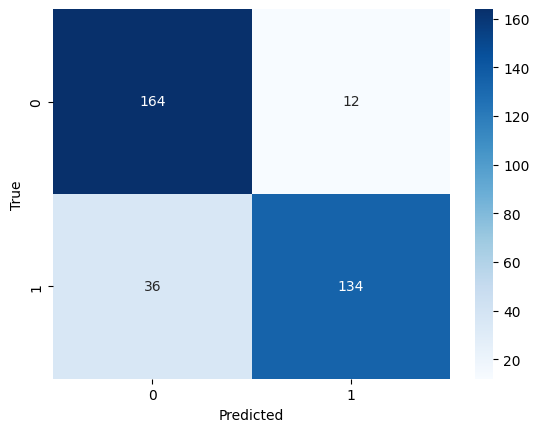

In [21]:

cm = confusion_matrix(real[data.truncated], pred[data.truncated])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")

print(classification_report(real[data.truncated], pred[data.truncated]))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       824
         1.0       0.94      0.90      0.92       830

    accuracy                           0.92      1654
   macro avg       0.92      0.92      0.92      1654
weighted avg       0.92      0.92      0.92      1654



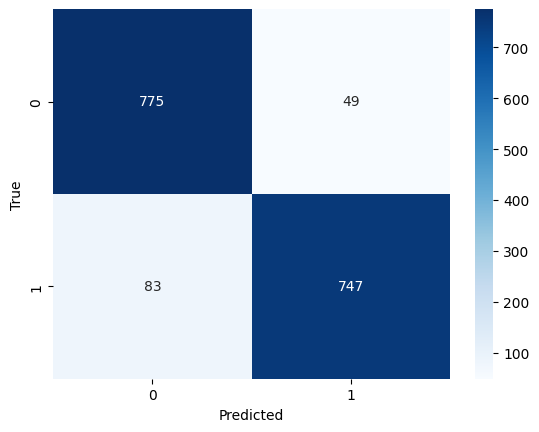

In [22]:
cm = confusion_matrix(real[~data.truncated], pred[~data.truncated])


sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")

print(classification_report(real[~data.truncated], pred[~data.truncated]))